In [12]:
import xgboost as xgb
from sklearn.metrics import root_mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_pickle("dataset/processed_data/rf/Xrf_train.pkl")
X_test = pd.read_pickle("dataset/processed_data/rf/Xrf_test.pkl")
y_train = pd.read_pickle("dataset/processed_data/rf/yrf_train.pkl")
y_test = pd.read_pickle("dataset/processed_data/rf/yrf_test.pkl")

In [3]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [4]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Standard loss function for regression
    n_estimators=500,  # Number of boosting rounds
    learning_rate=0.05,  # Step size shrinkage to prevent overfitting
    max_depth=6,  # Maximum depth of trees
    subsample=0.8,  # Fraction of samples used for training
    colsample_bytree=0.8,  # Fraction of features used per tree
    random_state=42
)

In [5]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [6]:
y_pred = xgb_model.predict(X_test)

In [7]:
rmse = root_mean_squared_error(y_test, y_pred)
print(f"✅ XGBoost Model RMSE: {rmse:.2f}")

✅ XGBoost Model RMSE: 26418.43


In [8]:
margen_error = (rmse / y_test.mean()) * 100
print(margen_error)

14.772120519280902


In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 500, 1000], 
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [4, 6, 8]
}

grid_search = GridSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42), 
    param_grid, 
    cv=5, 
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters

# Train with best params
best_xgb = xgb.XGBRegressor(**grid_search.best_params_, objective='reg:squarederror', random_state=42)
best_xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_xgb.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)



In [10]:
print(f"✅ Best Parameters: {grid_search.best_params_}")


✅ Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000}


In [11]:
print(f"✅ Optimized XGBoost Model RMSE: {rmse:.2f}")

✅ Optimized XGBoost Model RMSE: 28099.63


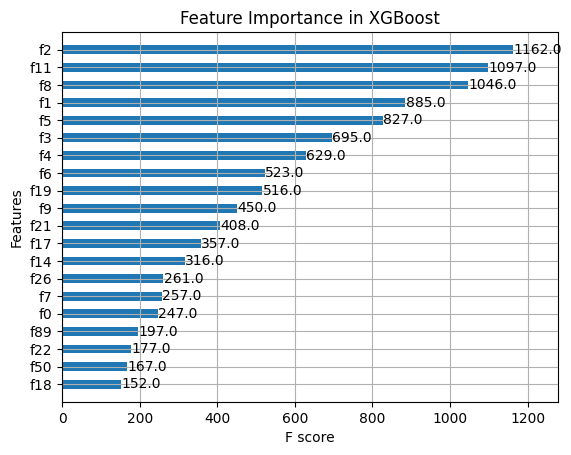

In [13]:


# Plot feature importance
xgb.plot_importance(best_xgb, max_num_features=20, importance_type='weight', height=0.5)
plt.title("Feature Importance in XGBoost")
plt.show()
